In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('husl')

In [3]:
#Changing Directory
os.getcwd()

'/content'

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/NLP/Twitter Sentiment Analysis/')

In [0]:
import tweepy
import re
import pickle

from tweepy import OAuthHandler

In [0]:
#Auth Details
consumer_key = 'yoIwFkjZGYDa49aO16XqSNqcN'
consumer_secret = 'gl4LQOItV7Z1aFwNrlvaiKJ3t8o8h99blMIAmnmdHxYjzjRAxO' 
access_token = '624310916-E7fDF2IE8P6bfY1oVFglASf6F8RnxMd3vgSXFqnZ'
access_secret ='ID9JcoXHsDcKtvNcnmBGcCQhUlO0wmwAxBJ6LCesiUAas'

In [0]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,timeout=10)

In [0]:
#Extracting data using search query
args = ['sheinspireus']
tweets1=[]
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",tweet_mode="extended",lang='en',locale='ja',result_type='recent',geocode="23.09515,79.688522,2000km",truncated=False).items():
      tweets1.append(status)

In [9]:
len(tweets1)

1560

In [0]:
total_tweets = [[tweet.created_at,
              tweet.user.name,
              tweet.user.location,
              tweet.user.description,
              tweet.full_text.encode("utf-8").decode("utf-8"), 
              tweet.favorite_count, 
              tweet.retweet_count, 
              ] 
             for idx,tweet in enumerate(tweets1)]

In [0]:
#Creating Dataframe
df =pd.DataFrame(total_tweets,columns=["Time_Stamp","Name","Location","Description", "Text","Favorite_count","Retweets_count"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 7 columns):
Time_Stamp        1560 non-null datetime64[ns]
Name              1560 non-null object
Location          1560 non-null object
Description       1560 non-null object
Text              1560 non-null object
Favorite_count    1560 non-null int64
Retweets_count    1560 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 85.4+ KB


In [13]:
df.head()

,Time_Stamp,Name,Location,Description,Text,Favorite_count,Retweets_count
0,2020-03-09 15:27:54,News Aur Chai,Mumbai,News Aur Chai is an Indian digital alternative...,#NACRealHeroes: Women Behind Modi's She Inspir...,0,0
1,2020-03-09 12:47:06,Dr Tamilisai Soundararajan,"Hyderabad, India",MBBS DGO \nGovernor of Telangana,Thankyou honb @PMOIndia your unique gesture 2 ...,95,15
2,2020-03-09 12:29:21,Sirisha tekumudi,Vijayawada Andhrapradesh,"sirisha https://t.co/oqhsy7rYy8 trainer, inter...",#sheinspireus t.sirisha.tnq legend honorable p...,7,0
3,2020-03-09 12:14:49,Raghvesh Narain Tripathi,Lucknow Uttar Pradesh India,We are proud that we are Indians🚩RSS BJP🚩 Soci...,Women take charge of PM's social media account...,0,0
4,2020-03-09 11:12:19,InfrasoftTech,India,InfrasoftTech is a leading #FinTech digital so...,"Celebrating the divine force, the power, and t...",2,1


In [0]:
#Extracting hashtags from tweets
hashtags = df["Text"].str.extractall(r'(\#\w+)')[0].value_counts().reset_index()
hashtags.columns = ["hash","count"]

Text(0.5, 1.0, 'Popular hashtags')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0,

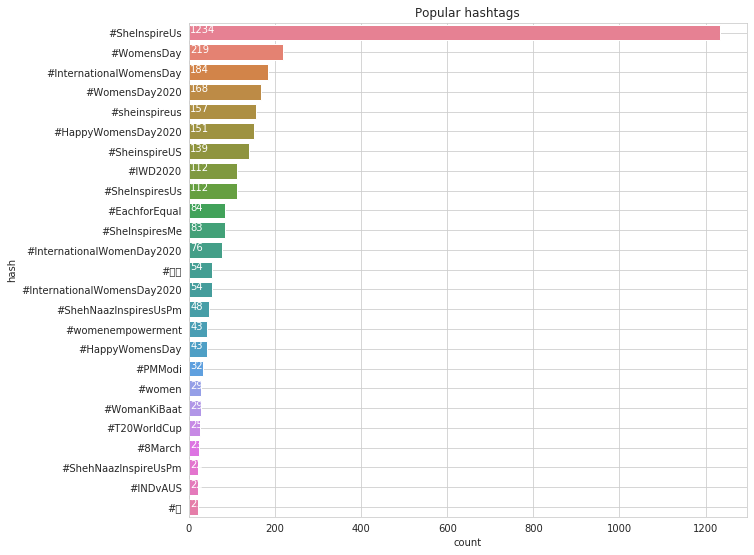

In [15]:
plt.figure(figsize = (10,20))
plt.subplot(211)
ax = sns.barplot(x = "count" , y = "hash" ,
                 data = hashtags[:25] , palette = "husl")
plt.grid(True)
for i,j in enumerate(hashtags["count"][:25].values) :
    ax.text(3,i,j,fontsize = 10,color = "white")
plt.title("Popular hashtags")

In [0]:
#Extract accounts from tweets
accounts = df["Text"].str.extractall(r'(\@\w+)')[0].value_counts().reset_index()
accounts.columns = ["accounts","count"]

In [17]:
accounts.head()

,accounts,count
0,@narendramodi,500
1,@PMOIndia,94
2,@Shehnazgill123,47
3,@smritiirani,44
4,@snehamohandoss,33


Text(0.5, 1.0, 'Popular Accounts mentioned around this topic')

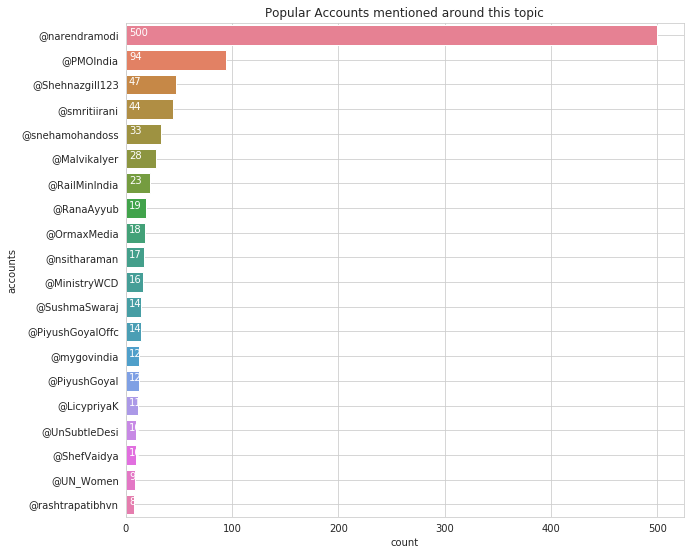

In [18]:
plt.figure(figsize = (10,20))
plt.subplot(211)
ax = sns.barplot(x = "count" , y = "accounts" ,
                 data = accounts[:20] , palette = "husl")
plt.grid(True)
for i,j in enumerate(accounts["count"][:20].values) :
    ax.text(3,i,j,fontsize = 10,color = "white")
plt.title("Popular Accounts mentioned around this topic")

In [0]:
#loaction of user
df['Location']=df['Location'].apply([lambda x:x.split(',')])

In [20]:
df.head()

,Time_Stamp,Name,Location,Description,Text,Favorite_count,Retweets_count
0,2020-03-09 15:27:54,News Aur Chai,[Mumbai],News Aur Chai is an Indian digital alternative...,#NACRealHeroes: Women Behind Modi's She Inspir...,0,0
1,2020-03-09 12:47:06,Dr Tamilisai Soundararajan,"[Hyderabad, India]",MBBS DGO \nGovernor of Telangana,Thankyou honb @PMOIndia your unique gesture 2 ...,95,15
2,2020-03-09 12:29:21,Sirisha tekumudi,[Vijayawada Andhrapradesh ],"sirisha https://t.co/oqhsy7rYy8 trainer, inter...",#sheinspireus t.sirisha.tnq legend honorable p...,7,0
3,2020-03-09 12:14:49,Raghvesh Narain Tripathi,[Lucknow Uttar Pradesh India],We are proud that we are Indians🚩RSS BJP🚩 Soci...,Women take charge of PM's social media account...,0,0
4,2020-03-09 11:12:19,InfrasoftTech,[India],InfrasoftTech is a leading #FinTech digital so...,"Celebrating the divine force, the power, and t...",2,1


In [0]:
df['Location']=df["Location"].apply(lambda x:x[0])

In [22]:
df.head()

,Time_Stamp,Name,Location,Description,Text,Favorite_count,Retweets_count
0,2020-03-09 15:27:54,News Aur Chai,Mumbai,News Aur Chai is an Indian digital alternative...,#NACRealHeroes: Women Behind Modi's She Inspir...,0,0
1,2020-03-09 12:47:06,Dr Tamilisai Soundararajan,Hyderabad,MBBS DGO \nGovernor of Telangana,Thankyou honb @PMOIndia your unique gesture 2 ...,95,15
2,2020-03-09 12:29:21,Sirisha tekumudi,Vijayawada Andhrapradesh,"sirisha https://t.co/oqhsy7rYy8 trainer, inter...",#sheinspireus t.sirisha.tnq legend honorable p...,7,0
3,2020-03-09 12:14:49,Raghvesh Narain Tripathi,Lucknow Uttar Pradesh India,We are proud that we are Indians🚩RSS BJP🚩 Soci...,Women take charge of PM's social media account...,0,0
4,2020-03-09 11:12:19,InfrasoftTech,India,InfrasoftTech is a leading #FinTech digital so...,"Celebrating the divine force, the power, and t...",2,1


In [0]:
location=pd.DataFrame(df['Location'].value_counts().reset_index(),columns=['index','Location'])

In [0]:
location.columns=['Location','Count']

In [25]:
location.head()

,Location,Count
0,India,313
1,New Delhi,195
2,Mumbai,103
3,Hyderabad,65
4,Bengaluru,51


Text(0.5, 1.0, 'Tweets Generated Location')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 

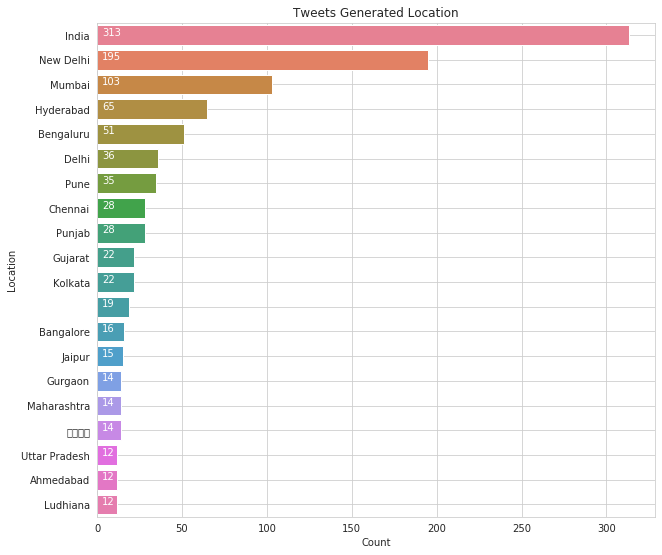

In [26]:
plt.figure(figsize = (10,20))
plt.subplot(211)
ax = sns.barplot(x = "Count" , y = "Location" ,
                 data = location[:20] , palette ='husl')
plt.grid(True)
for i,j in enumerate(location["Count"][:20].values) :
    ax.text(3,i,j,fontsize = 10,color = "white")
plt.title("Tweets Generated Location")

In [0]:
name=pd.DataFrame(df['Name'].value_counts().reset_index(),columns=['index','Name'])

In [28]:
name.head()

,index,Name
0,Tanya Kaur ☄,25
1,SouthCentralRailway,18
2,Kyrascope™ Toy Reviews,12
3,Flipper Navjot Gill,11
4,प्रेम हिंदुस्तानी 🇮🇳,10


In [0]:
name.columns=['Names','Count']

In [30]:
name.head()

,Names,Count
0,Tanya Kaur ☄,25
1,SouthCentralRailway,18
2,Kyrascope™ Toy Reviews,12
3,Flipper Navjot Gill,11
4,प्रेम हिंदुस्तानी 🇮🇳,10


Text(0.5, 1.0, 'Most Frequent Users')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2346 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s

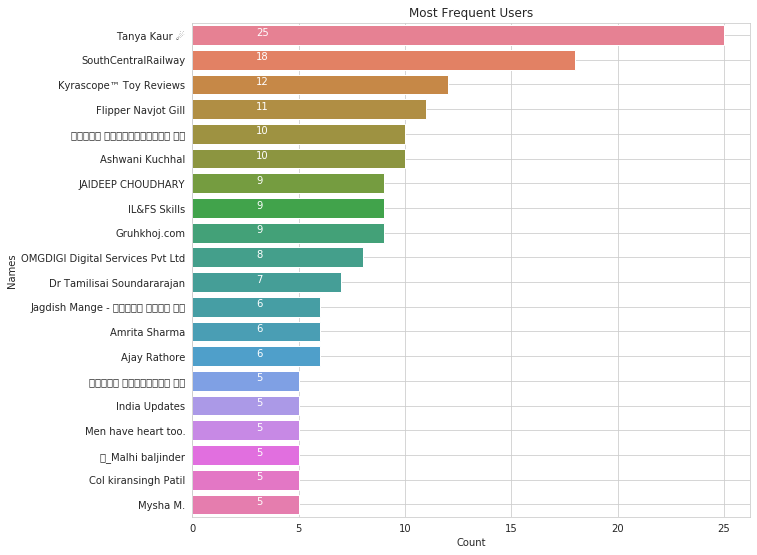

In [31]:
plt.figure(figsize = (10,20))
plt.subplot(211)
ax = sns.barplot(x = "Count" , y = "Names" ,
                 data = name[:20] , palette = "husl")
plt.grid(True)
for i,j in enumerate(name["Count"][:20].values) :
    ax.text(3,i,j,fontsize = 10,color = "white")
plt.title("Most Frequent Users")

In [0]:
#hashes mentioned in accounts and accounts mentioned in hashs
accounts = df["Text"].str.extractall(r'(\@\w+)')[0].reset_index()[["level_0",0]]
hash_tag = df["Text"].str.extractall(r'(\#\w+)')[0].reset_index()[["level_0",0]]

In [33]:
accounts = df["Text"].str.extractall(r'(\@\w+)')[0].reset_index()[["level_0",0]]
hash_tag = df["Text"].str.extractall(r'(\#\w+)')[0].reset_index()[["level_0",0]]
lf = hash_tag.merge(accounts,left_on = "level_0",right_on = "level_0",how = "left")[["0_x","0_y"]]
rt = accounts.merge(hash_tag,left_on = "level_0",right_on = "level_0",how = "left")[["0_x","0_y"]]
lf = lf.rename(columns = {"0_y" : "accs","0_x" : "hashs"})[["hashs","accs"]]
rt = rt.rename(columns = {"0_x" : "accs","0_y" : "hashs"})[["hashs","accs"]]
newdat = pd.concat([lf,rt],axis = 0)
newdat

,hashs,accs
0,#NACRealHeroes,@NewsAurChai
1,#NACRealHeroes,@manralbarkha
2,#SheInspireUs,@NewsAurChai
3,#SheInspireUs,@manralbarkha
4,#WomensDay,@NewsAurChai
...,...,...
5881,#SheInspireUs,@narendramodi
5882,#SheInspireUs,@Divsbabs
5883,#SheInspireUs,@PMOIndia
5884,#SheInspireus,@narendramodi


In [0]:
import networkx as nx

def connect_hash_acc(word,connect_type) :
    
    if connect_type == "hashtag_to_account" : 
        df = newdat[newdat["hashs"] == word]
        df = df[df["accs"].notnull()]
    elif connect_type == "account_to_hashtag" : 
        df = newdat[newdat["accs"] == word] 
        df = df[df["hashs"].notnull()]
        
    G  = nx.from_pandas_edgelist(df,"hashs","accs")
    plt.figure(figsize = (13,10))
    nx.draw_networkx(G,with_labels = True,font_size = 10,
                     font_color = "k",
                     font_family  = "DejaVu Sans",
                     node_shape  = "h",node_color = "C",
                     node_size = 1000,linewidths = 10,
                     edge_color = "grey",alpha = 0.6)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:417: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  label=label)


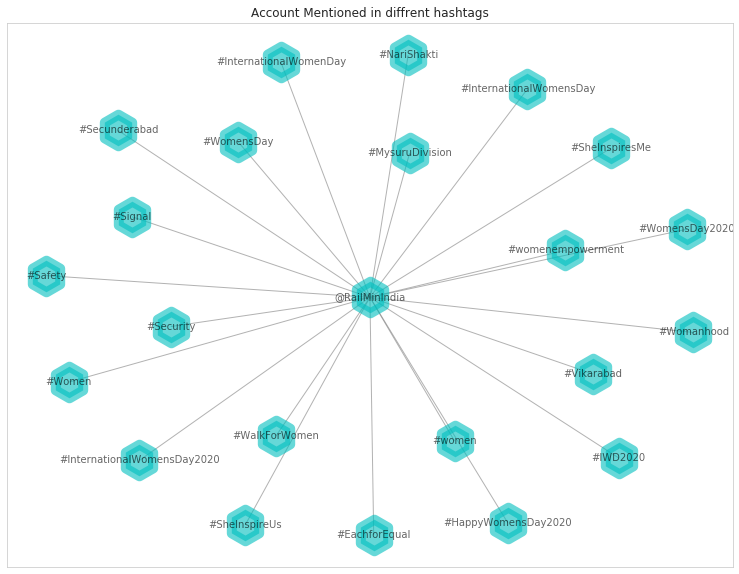

In [35]:
connect_hash_acc("@RailMinIndia","account_to_hashtag")
plt.title('Account Mentioned in diffrent hashtags')
plt.grid(False)

<Figure size 1080x1800 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0,

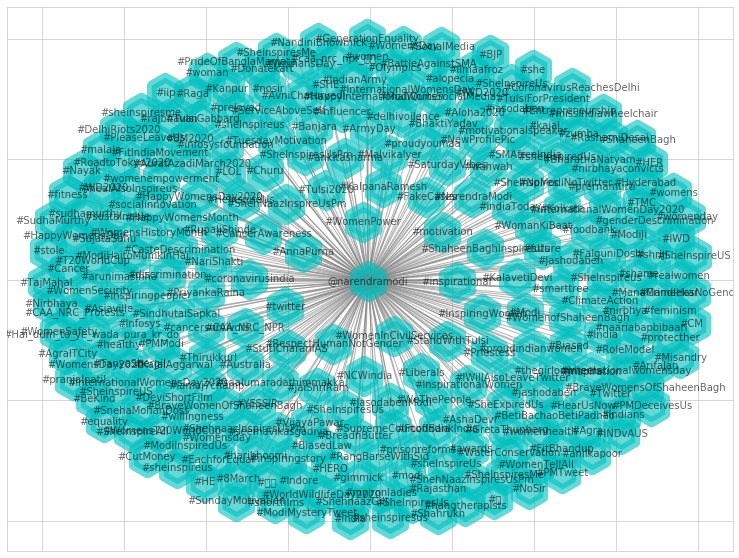

In [36]:

plt.figure(figsize=(15,25))
connect_hash_acc("@narendramodi","account_to_hashtag")
plt.grid(True)

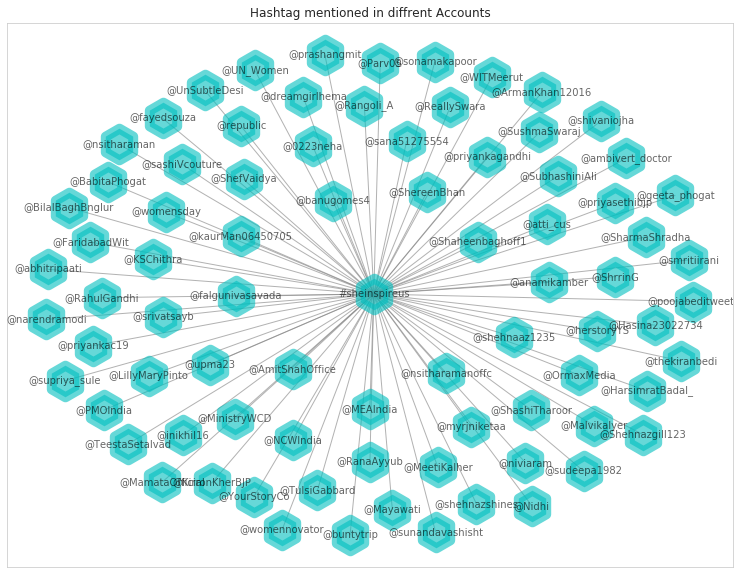

In [37]:
connect_hash_acc("#sheinspireus","hashtag_to_account")
plt.title('Hashtag mentioned in diffrent Accounts')
plt.grid(False)

In [38]:
df.head()

,Time_Stamp,Name,Location,Description,Text,Favorite_count,Retweets_count
0,2020-03-09 15:27:54,News Aur Chai,Mumbai,News Aur Chai is an Indian digital alternative...,#NACRealHeroes: Women Behind Modi's She Inspir...,0,0
1,2020-03-09 12:47:06,Dr Tamilisai Soundararajan,Hyderabad,MBBS DGO \nGovernor of Telangana,Thankyou honb @PMOIndia your unique gesture 2 ...,95,15
2,2020-03-09 12:29:21,Sirisha tekumudi,Vijayawada Andhrapradesh,"sirisha https://t.co/oqhsy7rYy8 trainer, inter...",#sheinspireus t.sirisha.tnq legend honorable p...,7,0
3,2020-03-09 12:14:49,Raghvesh Narain Tripathi,Lucknow Uttar Pradesh India,We are proud that we are Indians🚩RSS BJP🚩 Soci...,Women take charge of PM's social media account...,0,0
4,2020-03-09 11:12:19,InfrasoftTech,India,InfrasoftTech is a leading #FinTech digital so...,"Celebrating the divine force, the power, and t...",2,1


In [0]:
#Cleaning tweets
def clean_text(data,col):
  corpus=[]
  for i in range(len(data[col])):
    text=re.sub(r'http\S+', ' ', data[col][i])
    text=text.lower()
    text=re.sub(r"that's","that is",text)
    text = re.sub(r"there's","there is",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"where's","where is",text)
    text = re.sub(r"it's","it is",text)
    text = re.sub(r"who's","who is",text)
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"she's","she is",text)
    text = re.sub(r"he's","he is",text)
    text = re.sub(r"they're","they are",text)
    text = re.sub(r"who're","who are",text)
    text = re.sub(r"ain't","am not",text)
    text = re.sub(r"wouldn't","would not",text)
    text = re.sub(r"shouldn't","should not",text)
    text = re.sub(r"can't","can not",text)
    text = re.sub(r"couldn't","could not",text)
    text = re.sub(r"won't","will not",text)
    text=re.sub(r'[@#\$%&\*\(\)\<\>\?\!\;\'\\-\_"]',' ',text)
    text= re.sub(r'\W',' ',text)
    text=re.sub(r'\d',' ',text)
    text=re.sub(r'^[a-z]\s',' ',text)
    text=re.sub(r'\s+[a-z]\s+',' ',text)
    text=re.sub(r'\s+[a-z]$',' ',text)
    text=re.sub(r'\s+',' ',text)
    corpus.append(text)
  return corpus

In [0]:
df['Text']=clean_text(df,'Text')

In [41]:
df.head()

,Time_Stamp,Name,Location,Description,Text,Favorite_count,Retweets_count
0,2020-03-09 15:27:54,News Aur Chai,Mumbai,News Aur Chai is an Indian digital alternative...,nacrealheroes women behind modi she inspire u...,0,0
1,2020-03-09 12:47:06,Dr Tamilisai Soundararajan,Hyderabad,MBBS DGO \nGovernor of Telangana,thankyou honb pmoindia your unique gesture use...,95,15
2,2020-03-09 12:29:21,Sirisha tekumudi,Vijayawada Andhrapradesh,"sirisha https://t.co/oqhsy7rYy8 trainer, inter...",sheinspireus sirisha tnq legend honorable pm ...,7,0
3,2020-03-09 12:14:49,Raghvesh Narain Tripathi,Lucknow Uttar Pradesh India,We are proud that we are Indians🚩RSS BJP🚩 Soci...,women take charge of pm social media accounts ...,0,0
4,2020-03-09 11:12:19,InfrasoftTech,India,InfrasoftTech is a leading #FinTech digital so...,celebrating the divine force the power and the...,2,1


In [42]:
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#Removing stopword
def remove_stopword(data,col):
  corpus=[]
  s=set(stopwords.words('english'))
  s1=['not','or','no','nor']
  for i in s1:
    if i in s:
      s.remove(i)
  for i in range(len(data[col])):
    words = nltk.word_tokenize(data[col][i])
    word1 = [word for word in words if word not in s]
    corpus.append(' '.join(word1))
  return corpus

In [0]:
df['Text']=remove_stopword(df,'Text')

In [45]:
df.head()

,Time_Stamp,Name,Location,Description,Text,Favorite_count,Retweets_count
0,2020-03-09 15:27:54,News Aur Chai,Mumbai,News Aur Chai is an Indian digital alternative...,nacrealheroes women behind modi inspire us cam...,0,0
1,2020-03-09 12:47:06,Dr Tamilisai Soundararajan,Hyderabad,MBBS DGO \nGovernor of Telangana,thankyou honb pmoindia unique gesture use twit...,95,15
2,2020-03-09 12:29:21,Sirisha tekumudi,Vijayawada Andhrapradesh,"sirisha https://t.co/oqhsy7rYy8 trainer, inter...",sheinspireus sirisha tnq legend honorable pm n...,7,0
3,2020-03-09 12:14:49,Raghvesh Narain Tripathi,Lucknow Uttar Pradesh India,We are proud that we are Indians🚩RSS BJP🚩 Soci...,women take charge pm social media accounts sha...,0,0
4,2020-03-09 11:12:19,InfrasoftTech,India,InfrasoftTech is a leading #FinTech digital so...,celebrating divine force power source inspirat...,2,1


In [0]:
pop_word = (df["Text"].apply(lambda x : 
                                         pd.value_counts(x.split(" ")))
            .sum(axis = 0).reset_index().sort_values(by = [0],ascending = False))
pop_word.columns = ["word","count"]

In [0]:
pop_word["word"] = pop_word["word"].str.upper()

In [48]:
pop_word.head()

,word,count
7,SHEINSPIREUS,1577.0
18,WOMEN,708.0
13,NARENDRAMODI,524.0
8,WOMENSDAY,403.0
70,DAY,277.0


In [0]:
from wordcloud import WordCloud
def wordcloud(words,back_color,palette,title) :
    word_cloud = WordCloud(scale = 7,max_words = 1000,
                           max_font_size = 100,background_color = back_color,
                           random_state = 0,colormap = palette
                          ).generate(" ".join(words))
    plt.figure(figsize = (13,8))
    plt.imshow(word_cloud,interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

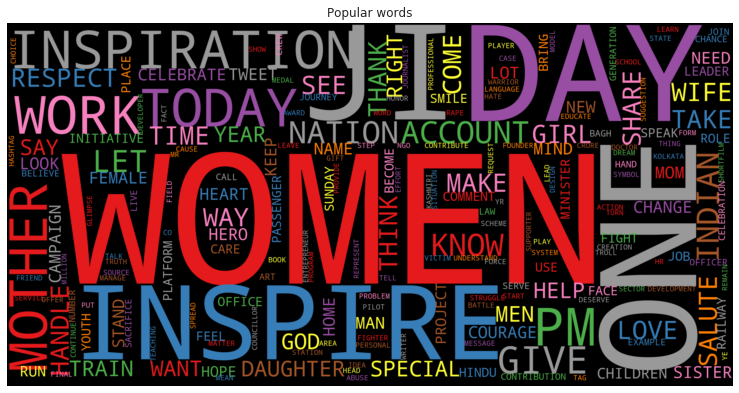

In [50]:
wordcloud(pop_word['word'],'black','Set1','Popular words')
plt.style.use('dark_background')

In [0]:
#Importing tfidf model
#https://github.com/shakya2417/Twitter-Sentiment-Analysis-Deep-Learning--ahead-of-Trump-visit-India/blob/master/Models/TW_tfidf%20.ipynb
with open('model_tfidf.pickle','rb') as f:
  model=pickle.load(f)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
def tfidf(data,col):
  vectorizer = CountVectorizer(max_features = 500, min_df = 1, max_df = 0.9)
  X = vectorizer.fit_transform(data[col]).toarray()
  transformer = TfidfTransformer()
  X = transformer.fit_transform(X).toarray()
  return X

In [0]:
df_test=tfidf(df,"Text")

In [56]:
df_test.shape

(1560, 500)

In [0]:
pre=model.predict(df_test)

In [58]:
pre

array([[0.1106731 ],
       [0.2200942 ],
       [0.746555  ],
       ...,
       [0.67814136],
       [0.7260861 ],
       [0.84345466]], dtype=float32)

In [0]:
def sentiment(prob):
  if prob>0.6:
    return 'Positive'
  elif prob<=0.6 and prob>0.25:
    return 'Nuetral'
  else:
      return 'Negative'

In [0]:
def sentiment_pred(prob):
  y_senti=[]
  for i in range(len(prob)):
    y_senti.append(sentiment(prob[i]))
  return y_senti

In [0]:
df_pre=sentiment_pred(pre)

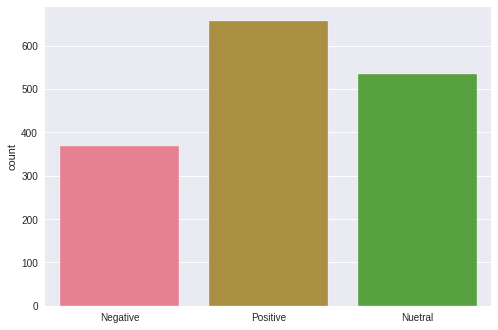

In [63]:
sns.countplot(df_pre)
plt.style.use('seaborn')
sns.set_palette('husl')

In [0]:
df_predicted=pd.DataFrame({'Text':df['Text'],'Sentiment':df_pre})

In [0]:
pos_pop = (df_predicted[df_predicted['Sentiment']=='Positive']['Text'].apply(lambda x : 
                                         pd.value_counts(x.split(" ")))
            .sum(axis = 0).reset_index().sort_values(by = [0],ascending = False))
pos_pop.columns = ["word","count"]
pos_pop["word"] = pos_pop["word"].str.upper()

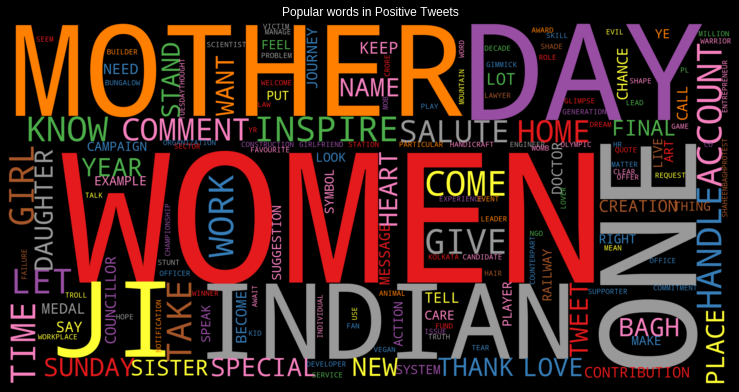

In [68]:
wordcloud(pos_pop['word'],'black','Set1','Popular words in Positive Tweets')
plt.style.use('dark_background')

In [0]:
neg_pop = (df_predicted[df_predicted['Sentiment']=='Negative']['Text'].apply(lambda x : 
                                         pd.value_counts(x.split(" ")))
            .sum(axis = 0).reset_index().sort_values(by = [0],ascending = False))
neg_pop.columns = ["word","count"]
neg_pop["word"] = neg_pop["word"].str.upper()

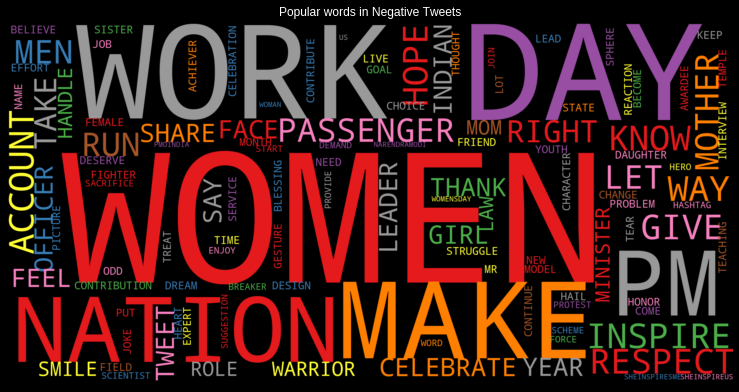

In [70]:
wordcloud(neg_pop['word'],'black','Set1','Popular words in Negative Tweets')